In [12]:
import numpy as np
from European_Hedge import European_Hedge
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
%%time
hedge = European_Hedge(100,105,0,.02,2,1,sgm=.3)
hedge.BSDeltaHedgeMC(100000,100,CI=True)


        95% Confidence Interval
        -----------------------
 0.11008522722042563  -  0.44277629920459466

Wall time: 428 ms


(0.27643076321251014, 0.08317276799604226)

In [3]:
%%time
hedge.PriceMC(10000000,CI=True)


        95% Confidence Interval
        -----------------------
 16.409047245397854  -  16.449320251139643

Wall time: 914 ms


(16.42918374826875, 0.010068251435446282)

In [ ]:
n=100
Simulations=np.zeros((16,3))
trials=np.zeros(16)
for i in range(16):
    trials[i]=n
    MC,MCstd=hedge.BSDeltaHedgeMC(n,100,CI=False)
    Simulations[i,:]=MC-2*MCstd,MC,MC+2*MCstd
    n*=2

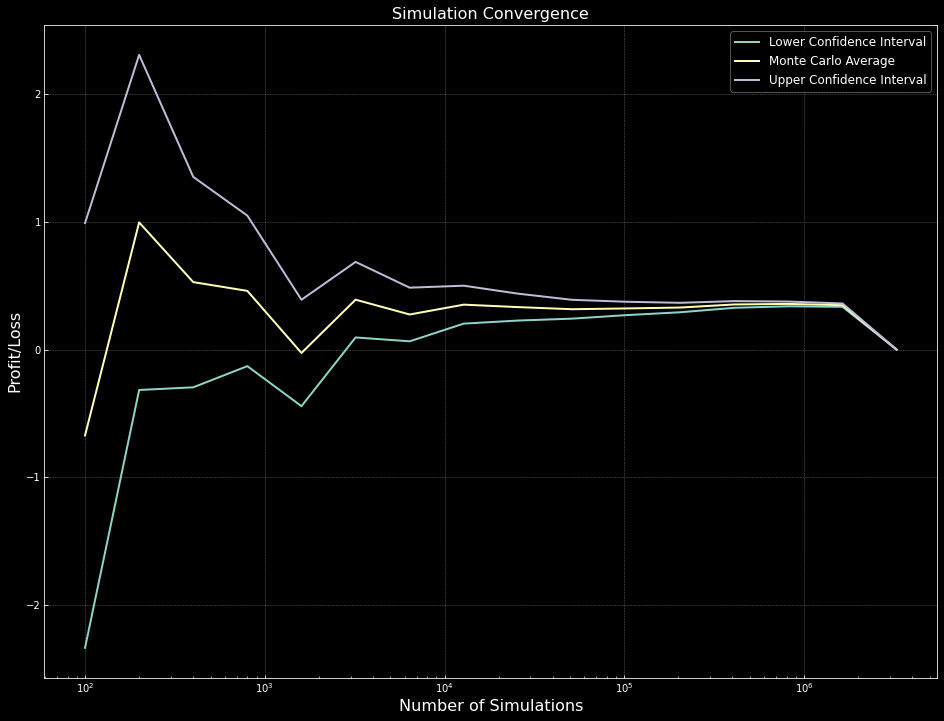

In [31]:
# Convergence Plot
plt.figure(figsize=(16,12))

plt.title('Simulation Convergence',fontsize=16)
plt.xlabel("Number of Simulations",fontsize=16)
plt.ylabel("Profit/Loss",fontsize=16)
plt.xscale("log")

plt.plot(trials,Simulations) 
plt.legend(("Lower Confidence Interval","Monte Carlo Average","Upper Confidence Interval"), fontsize=12)
plt.grid(True,alpha=.4)
#plt.savefig("MCHedge_Convergence.jpg",bbox_inches='tight')
plt.show()